## Метод главных компонент
Уменьшите размерность при помощи библиотеки sklearn. Обратите внимание на параметр `svd_solver`, он отвечает за способ построения матричного разложения. Чтобы получать одинаковые результаты (в частности, согласованные с лекцией), используйте следующий параметр метода PCA: `svd_solver='full'`

## Задание 1

В [предложенном файле](https://courses.openedu.ru/assets/courseware/v1/74add5c672abca967911f18fb2f47cbb/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/7_36.csv) находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры:
1. координату первого объекта относительно первой главной компоненты
2. координату первого объекта относительно второй главной компоненты
3. долю объясненной дисперсии при использовании первых двух главных компонент
4. минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85
5. количество групп объектов можно выделить, если использовать только первые две главных компоненты?

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

col_names = [str(i) for i in range(1, 11)]
df = pd.read_csv("https://courses.openedu.ru/assets/courseware/v1/74add5c672abca967911f18fb2f47cbb/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/7_36.csv", names=col_names)
df.head()

,1,2,3,4,5,6,7,8,9,10
0,-2.519835,-8.436880,6.908510,-5.459656,0.807541,6.730460,-4.816084,20.789244,-15.970319,11.538241
1,-0.939080,-9.517724,5.068608,-5.975369,-2.311275,11.211044,-3.683589,20.049591,-14.777884,10.716441
2,3.996932,20.484006,-13.001079,0.265866,21.042509,-20.503339,1.021815,12.317026,11.124606,-3.208932
3,2.374288,22.172050,-12.343866,2.290899,21.164085,-19.993777,-0.841419,13.849074,9.188879,-1.658120
4,10.874542,15.215994,-4.848376,-23.462558,-8.660415,19.597282,-14.492233,-4.495939,21.309876,-24.099745


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       60 non-null     float64
 1   2       60 non-null     float64
 2   3       60 non-null     float64
 3   4       60 non-null     float64
 4   5       60 non-null     float64
 5   6       60 non-null     float64
 6   7       60 non-null     float64
 7   8       60 non-null     float64
 8   9       60 non-null     float64
 9   10      60 non-null     float64
dtypes: float64(10)
memory usage: 4.8 KB


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full').fit(df)
df_reduced = pca.fit_transform(df)
df_reduced[0] # 1-2

array([-14.27903089, -16.39322252])

In [32]:
print("explained variance ratio (n_components=2):", sum(pca.explained_variance_ratio_)) # 3

explained variance ratio (first two components): 0.6541776067990506


In [34]:
print("explained variance ratio (n_components=3):", sum(PCA(n_components=3, svd_solver='full').fit(df).explained_variance_ratio_)) # 4

explained variance ratio (first three components): 0.873844745971152


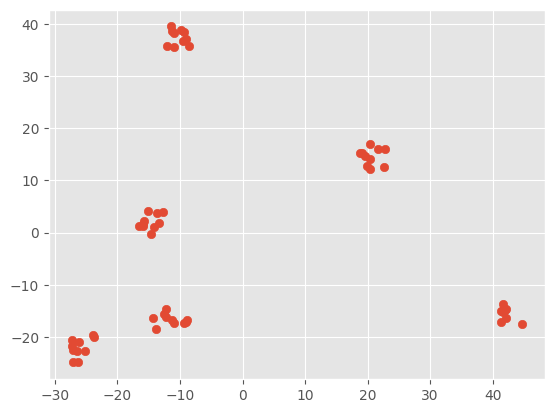

In [38]:
plt.scatter(df_reduced[:,0], df_reduced[:,1]) # 5

## Задание 2

Для прохода на новогодний корпоратив в ИТМО при входе нужно отгадать «логотип мероприятия». Для получения изображения логотипа необходимо по первым десяти главным компонентам восстановить исходное изображение (в качестве пригласительных рассылались [матрица счётов](https://courses.openedu.ru/assets/courseware/v1/ee3345b3500b7571a589d3caa49ec743/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/X_reduced_417.csv) и [матрица весов](https://courses.openedu.ru/assets/courseware/v1/ad22c96aa75c298f81ec21de6f334865/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/X_loadings_417.csv) первых десяти ГК).

In [57]:

X_reduced = pd.read_csv("https://courses.openedu.ru/assets/courseware/v1/ee3345b3500b7571a589d3caa49ec743/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/X_reduced_417.csv", delimiter=";", names=col_names)
X_reduced.shape

(100, 10)

In [58]:
Theta = pd.read_csv("https://courses.openedu.ru/assets/courseware/v1/ad22c96aa75c298f81ec21de6f334865/asset-v1:ITMOUniversity+ADVMLAUTXT+spring_2023_ITMO_mag+type@asset+block/X_loadings_417.csv", delimiter=";", names=col_names)
Theta.shape

(100, 10)

In [59]:
X = X_reduced.dot(Theta.T)
X.shape

(100, 100)

<Axes: >

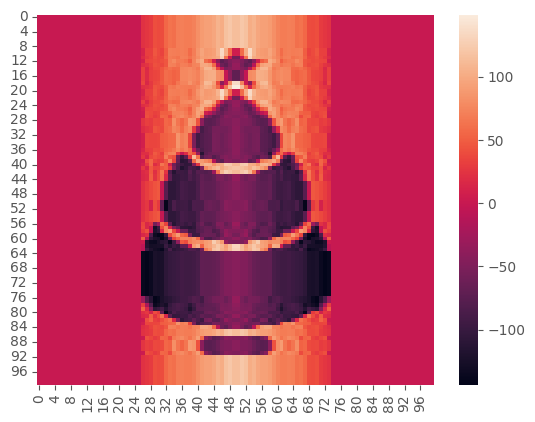

In [61]:
import seaborn as sns

sns.heatmap(X)

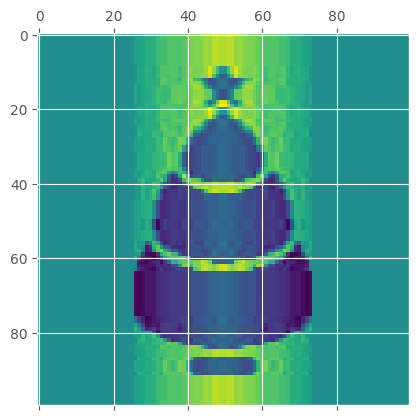

In [62]:
plt.matshow(X)